<a href="https://colab.research.google.com/github/AntoninaRemizova/Minor/blob/main/%D0%A0%D0%B5%D0%BC%D0%B8%D0%B7%D0%BE%D0%B2%D0%B0_%D0%94%D0%97_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Загрузка данных

In [2]:
url = "https://raw.githubusercontent.com/AntoninaRemizova/Minor/main/Japan.xlsx"
df = pd.read_excel(url)
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, format='%d.%m.%Y')
df

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день
0,Япония,2020-07-20,25680,19603.0,988,418,392.0,2,127110047,562726,12114
1,Япония,2020-07-21,26312,20001.0,989,632,398.0,1,127110047,579083,16357
2,Япония,2020-07-22,27107,20482.0,990,795,481.0,1,127110047,587393,8310
3,Япония,2020-07-23,28088,20878.0,992,981,396.0,2,127110047,593088,5695
4,Япония,2020-07-24,28867,21173.0,995,779,295.0,3,127110047,602618,9530
...,...,...,...,...,...,...,...,...,...,...,...
604,Япония,2022-03-16,5913591,NaN,26625,57822,NaN,163,127110047,40063837,156343
605,Япония,2022-03-17,5967069,NaN,26796,53478,NaN,171,127110047,40240745,176908
606,Япония,2022-03-18,6016178,NaN,26952,49109,NaN,156,127110047,40335554,94809
607,Япония,2022-03-19,6060771,NaN,27056,44593,NaN,104,127110047,40388920,53366


# Удаление ненужных столбцов

In [3]:
cols_to_drop = ['Страна', 'Смертей за день', 'Тестов', 'Тестов за день']
df = df.drop(columns=cols_to_drop)
df

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Население страны
0,2020-07-20,25680,19603.0,988,418,392.0,127110047
1,2020-07-21,26312,20001.0,989,632,398.0,127110047
2,2020-07-22,27107,20482.0,990,795,481.0,127110047
3,2020-07-23,28088,20878.0,992,981,396.0,127110047
4,2020-07-24,28867,21173.0,995,779,295.0,127110047
...,...,...,...,...,...,...,...
604,2022-03-16,5913591,NaN,26625,57822,NaN,127110047
605,2022-03-17,5967069,NaN,26796,53478,NaN,127110047
606,2022-03-18,6016178,NaN,26952,49109,NaN,127110047
607,2022-03-19,6060771,NaN,27056,44593,NaN,127110047


# Выявление пропущенных значений

In [4]:
columns = df.columns.to_list()
nan_values = df[columns].isnull().sum()
print("Пропуски в столбцах:")
print(nan_values.to_string())

Пропуски в столбцах:
Дата                       0
Заражений                  0
Выздоровлений            228
Смертей                    0
Заражений за день          0
Выздоровлений за день    228
Население страны           0


In [5]:
rows_with_nan = df[df[columns].isnull().any(axis=1)]
print("\nСтроки с пропусками:")
rows_with_nan


Строки с пропусками:


,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Население страны
381,2021-08-05,987060,NaN,15239,15317,NaN,127110047
382,2021-08-06,1002867,NaN,15259,15807,NaN,127110047
383,2021-08-07,1018688,NaN,15273,15821,NaN,127110047
384,2021-08-08,1033214,NaN,15282,14526,NaN,127110047
385,2021-08-09,1045392,NaN,15294,12178,NaN,127110047
...,...,...,...,...,...,...,...
604,2022-03-16,5913591,NaN,26625,57822,NaN,127110047
605,2022-03-17,5967069,NaN,26796,53478,NaN,127110047
606,2022-03-18,6016178,NaN,26952,49109,NaN,127110047
607,2022-03-19,6060771,NaN,27056,44593,NaN,127110047


# Заполнение пропусков в данных о выздоровлениях с помощью тренда

In [6]:
df['Выздоровлений за день'] = df['Выздоровлений за день'].interpolate().fillna(0)
df['Выздоровлений'] = df['Выздоровлений'].interpolate().fillna(0)
df

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Население страны
0,2020-07-20,25680,19603.0,988,418,392.0,127110047
1,2020-07-21,26312,20001.0,989,632,398.0,127110047
2,2020-07-22,27107,20482.0,990,795,481.0,127110047
3,2020-07-23,28088,20878.0,992,981,396.0,127110047
4,2020-07-24,28867,21173.0,995,779,295.0,127110047
...,...,...,...,...,...,...,...
604,2022-03-16,5913591,852451.0,26625,57822,4734.0,127110047
605,2022-03-17,5967069,852451.0,26796,53478,4734.0,127110047
606,2022-03-18,6016178,852451.0,26952,49109,4734.0,127110047
607,2022-03-19,6060771,852451.0,27056,44593,4734.0,127110047


# Вычисление количества инфицированных (I) и количества восприимчивых (S)

In [7]:
df['I'] = df['Заражений'] - df['Выздоровлений'] - df['Смертей']
df['S'] = df['Население страны'] - df['Заражений']
df

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Население страны,I,S
0,2020-07-20,25680,19603.0,988,418,392.0,127110047,5089.0,127084367
1,2020-07-21,26312,20001.0,989,632,398.0,127110047,5322.0,127083735
2,2020-07-22,27107,20482.0,990,795,481.0,127110047,5635.0,127082940
3,2020-07-23,28088,20878.0,992,981,396.0,127110047,6218.0,127081959
4,2020-07-24,28867,21173.0,995,779,295.0,127110047,6699.0,127081180
...,...,...,...,...,...,...,...,...,...
604,2022-03-16,5913591,852451.0,26625,57822,4734.0,127110047,5034515.0,121196456
605,2022-03-17,5967069,852451.0,26796,53478,4734.0,127110047,5087822.0,121142978
606,2022-03-18,6016178,852451.0,26952,49109,4734.0,127110047,5136775.0,121093869
607,2022-03-19,6060771,852451.0,27056,44593,4734.0,127110047,5181264.0,121049276


# Нормировка на 100 тыс. населения

In [8]:
N = df['Население страны'].iloc[0]
coef_norm = 100000
df['I_norm'] = df['I'] * coef_norm / N
df['S_norm'] = df['S'] * coef_norm / N
df['R_norm'] = (df['Выздоровлений'] + df['Смертей']) * coef_norm / N
df['Заражений_за_день_norm'] = df['Заражений за день'] * coef_norm / N
df['Выздоровлений_за_день_norm'] = df['Выздоровлений за день'] * coef_norm / N
df

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Население страны,I,S,I_norm,S_norm,R_norm,Заражений_за_день_norm,Выздоровлений_за_день_norm
0,2020-07-20,25680,19603.0,988,418,392.0,127110047,5089.0,127084367,4.003617,99979.797034,16.199349,0.328849,0.308394
1,2020-07-21,26312,20001.0,989,632,398.0,127110047,5322.0,127083735,4.186923,99979.299827,16.513250,0.497207,0.313115
2,2020-07-22,27107,20482.0,990,795,481.0,127110047,5635.0,127082940,4.433166,99978.674384,16.892449,0.625442,0.378412
3,2020-07-23,28088,20878.0,992,981,396.0,127110047,6218.0,127081959,4.891824,99977.902612,17.205564,0.771772,0.311541
4,2020-07-24,28867,21173.0,995,779,295.0,127110047,6699.0,127081180,5.270236,99977.289757,17.440006,0.612855,0.232082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,2022-03-16,5913591,852451.0,26625,57822,4734.0,127110047,5034515.0,121196456,3960.753000,95347.660441,691.586559,45.489716,3.724332
605,2022-03-17,5967069,852451.0,26796,53478,4734.0,127110047,5087822.0,121142978,4002.690676,95305.588236,691.721088,42.072205,3.724332
606,2022-03-18,6016178,852451.0,26952,49109,4734.0,127110047,5136775.0,121093869,4041.202974,95266.953209,691.843816,38.635026,3.724332
607,2022-03-19,6060771,852451.0,27056,44593,4734.0,127110047,5181264.0,121049276,4076.203355,95231.871010,691.925635,35.082199,3.724332


# Оценка параметра интенсивности выздоровления ($\gamma$)

In [9]:
gamma = sum(df['Выздоровлений за день'] * df['I']) / sum(df['I']**2)
print(f"Оценка параметра γ: {gamma:.6f}")
print(f"Средняя продолжительность заболевания: {1/gamma:.2f} дней")

Оценка параметра γ: 0.001833
Средняя продолжительность заболевания: 545.50 дней


# Определение точек изменения тренда

In [10]:
def find_trend_changes(df, window=21):
    df = df.copy()
    df['Сглаженный_тренд'] = df['Заражений_за_день_norm'].rolling(window=window, min_periods=1).mean()
    df['Тренд'] = df['Сглаженный_тренд'].diff()
    sign_changes = np.where(np.diff(np.sign(df['Тренд'])))[0]
    change_points = [0] + list(sign_changes) + [len(df)-1]
    return sorted(list(set(change_points)))

change_points = find_trend_changes(df)

# Оценка параметра интенсивности заражения ($\beta$) на разных участках

In [11]:
beta_results = []
for i in range(len(change_points)-1):
    segment = df.iloc[change_points[i]:change_points[i+1]+1].copy()
    segment['Расчет'] = segment['S_norm'] * segment['I_norm'] / coef_norm
    beta = sum(segment['Заражений_за_день_norm'] * segment['Расчет']) / sum(segment['Расчет']**2)

    trend = "Рост" if segment['Заражений_за_день_norm'].iloc[-1] > segment['Заражений_за_день_norm'].iloc[0] else "Спад"

    beta_results.append({
        'Начало': segment['Дата'].iloc[0],
        'Конец': segment['Дата'].iloc[-1],
        'Дней': len(segment),
        'Тренд': trend,
        'β': beta,
    })

beta_df = pd.DataFrame(beta_results)
print("\nОценки параметра β по участкам:")
print(beta_df.to_string())


Оценки параметра β по участкам:
       Начало      Конец  Дней Тренд         β
0  2020-07-20 2020-07-26     7  Рост  0.118701
1  2020-07-26 2020-07-27     2  Спад  0.089492
2  2020-07-27 2020-08-02     7  Рост  0.124686
3  2020-08-02 2020-08-03     2  Спад  0.091901
4  2020-08-03 2020-08-17    15  Спад  0.080174
5  2020-08-17 2020-09-25    40  Спад  0.064396
6  2020-09-25 2020-09-30     6  Рост  0.078956
7  2020-09-30 2020-10-04     5  Спад  0.083259
8  2020-10-04 2020-10-05     2  Спад  0.053844
9  2020-10-05 2020-10-07     3  Рост  0.067731
10 2020-10-07 2020-10-10     4  Рост  0.094475
11 2020-10-10 2020-10-12     3  Спад  0.071860
12 2020-10-12 2020-10-16     5  Рост  0.082919
13 2020-10-16 2020-10-18     3  Спад  0.084308
14 2020-10-18 2020-10-19     2  Спад  0.056119
15 2020-10-19 2020-10-20     2  Рост  0.062478
16 2020-10-20 2020-10-21     2  Рост  0.086292
17 2020-10-21 2020-10-22     2  Рост  0.096440
18 2020-10-22 2021-01-24    95  Рост  0.086463
19 2021-01-24 2021-03-12   

# Разделение на фазы роста и спада заболеваемости

In [12]:
def detect_phases(df, window=21):
    df = df.copy()
    df['Заражений_за_день'] = df['Заражений_за_день_norm'].rolling(window, min_periods=1).mean()
    df['Тренд'] = df['Заражений_за_день'].diff()
    df['Фаза'] = 'Стабильно'

    growth_threshold = df['Тренд'].quantile(0.75)
    decline_threshold = df['Тренд'].quantile(0.25)

    df.loc[df['Тренд'] > growth_threshold, 'Фаза'] = 'Рост'
    df.loc[df['Тренд'] < decline_threshold, 'Фаза'] = 'Спад'

    for i in range(2, len(df)-2):
        if df['Фаза'].iloc[i-1] == df['Фаза'].iloc[i+1]:
            df.at[i, 'Фаза'] = df['Фаза'].iloc[i-1]

    return df

df = detect_phases(df)

# Построение SIR-модели

In [13]:
def sir_model(df, gamma, beta_values):
    S = np.zeros(len(df))
    I = np.zeros(len(df))
    R = np.zeros(len(df))

    S[0] = df['S_norm'].iloc[0]
    I[0] = df['I_norm'].iloc[0]
    R[0] = df['R_norm'].iloc[0]

    mean_beta = np.mean(list(beta_values.values())) if beta_values else 0.1

    for t in range(1, len(df)):
        current_phase = df['Фаза'].iloc[t]
        beta = beta_values.get(current_phase, mean_beta)

        adaptive_factor = 1 + 0.5 * (I[t-1] / df['I_norm'].max())

        dS = -beta * adaptive_factor * S[t-1] * I[t-1] / coef_norm
        dI = beta * adaptive_factor * S[t-1] * I[t-1] / coef_norm - gamma * I[t-1]
        dR = gamma * I[t-1]

        S[t] = max(S[t-1] + dS, 0)
        I[t] = max(I[t-1] + dI, 0)
        R[t] = max(R[t-1] + dR, 0)

    return I

# Вычисление $\beta$ для SIR-модели

In [14]:
beta_values = {}
for phase in df['Фаза'].unique():
    phase_data = df[df['Фаза'] == phase]
    if len(phase_data) < 5: continue

    X = (phase_data['S_norm'] * phase_data['I_norm'] / coef_norm).values.reshape(-1, 1)
    y = phase_data['Заражений_за_день_norm'].values
    weights = phase_data['I_norm'].values

    model = LinearRegression(fit_intercept=False, positive=True)
    model.fit(X, y, sample_weight=weights)
    beta_values[phase] = model.coef_[0] * 1.2

if not beta_values:
    X = (df['S_norm'] * df['I_norm'] / coef_norm).values.reshape(-1, 1)
    y = df['Заражений_за_день_norm'].values
    weights = df['I_norm'].values

    model = LinearRegression(fit_intercept=False, positive=True)
    model.fit(X, y, sample_weight=weights)
    beta_values = {'all': model.coef_[0] * 1.2}

# Визуализация

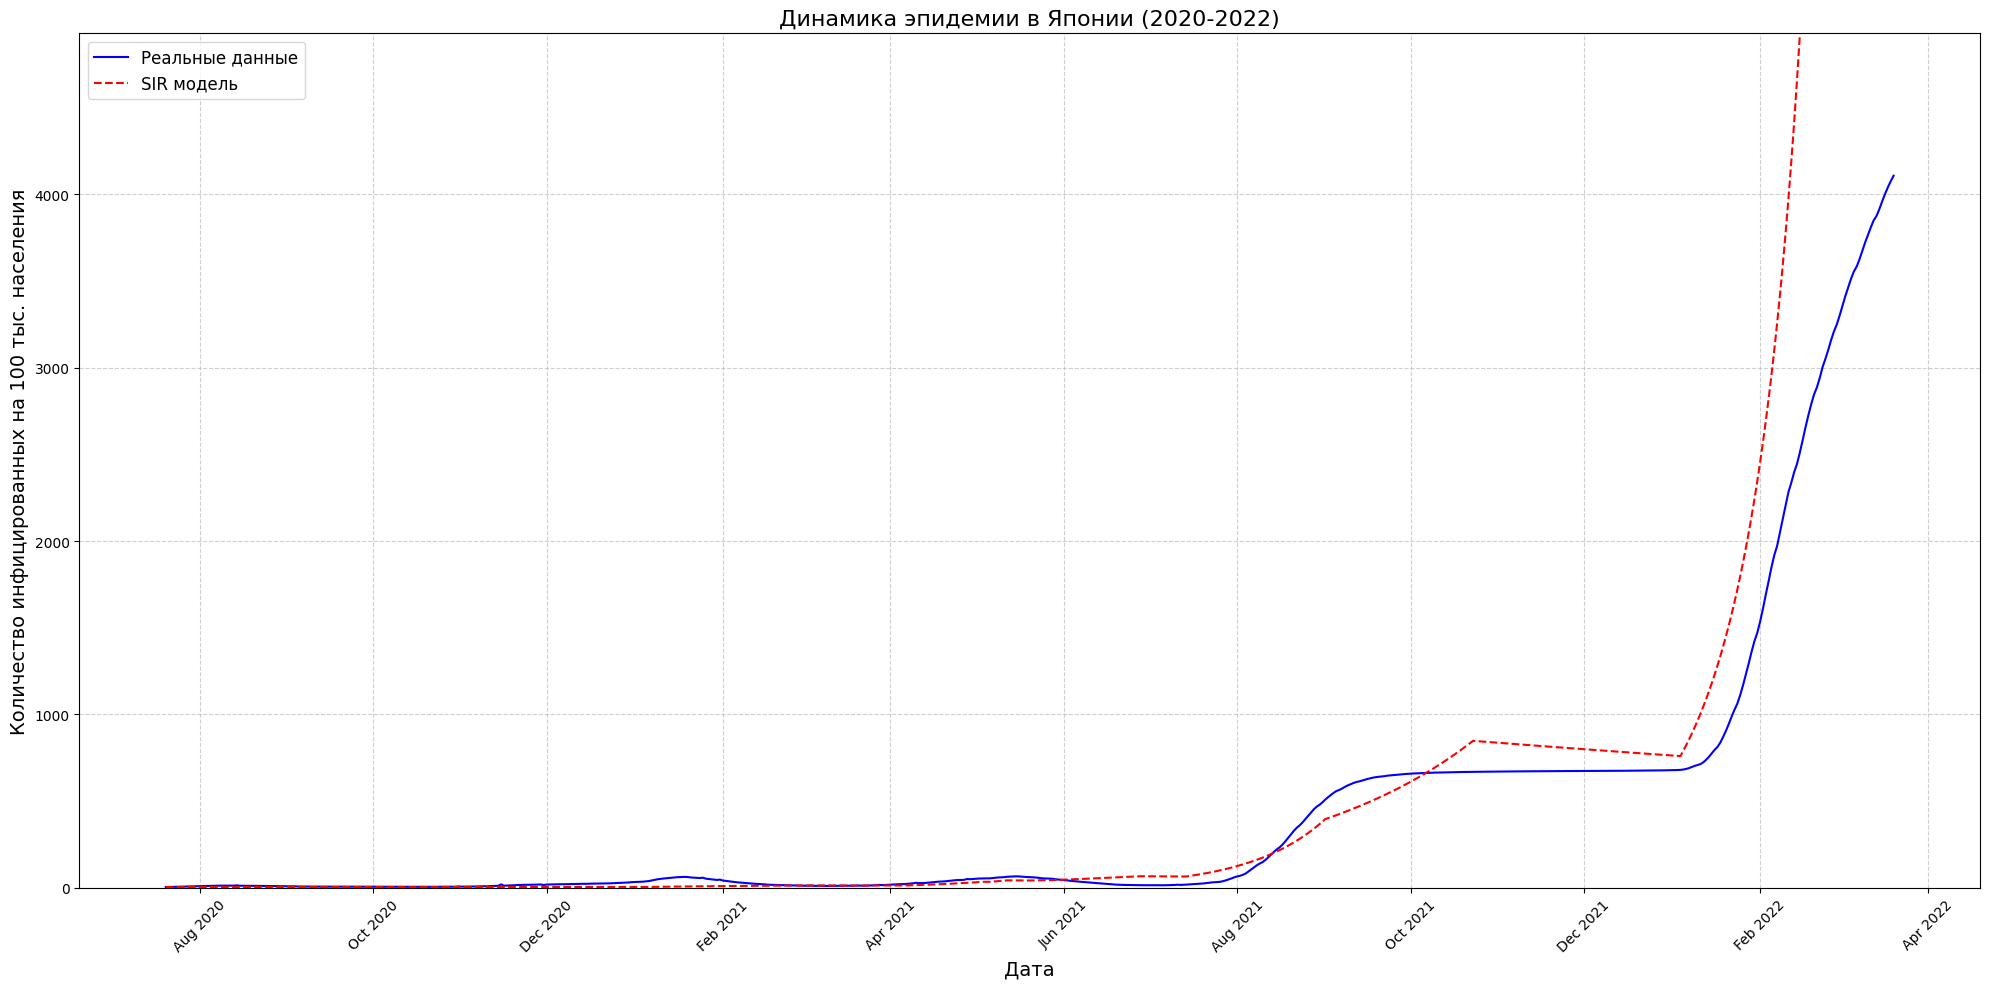

In [16]:
plt.figure(figsize=(20, 10))

plt.plot(df['Дата'], df['I_norm'], 'b-', label='Реальные данные')

predicted_I = sir_model(df, gamma, beta_values)
plt.plot(df['Дата'], predicted_I, 'r--', label='SIR модель')


plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество инфицированных на 100 тыс. населения', fontsize=14)
plt.title('Динамика эпидемии в Японии (2020-2022)', fontsize=16)
plt.ylim(0, df['I_norm'].max() * 1.2)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()